# Workbook 5
We will spend time finishing our lecture of logistic regression. In the second part, we will begin our discussion on panel analysis. The discussion on logistic regression are from A Gentle Introduction to Stata by Alan Acock. The discussion on panel analysis are from Multilevel and Longitudinal Modeling Using Stata by Sophia Rabe-Hesketh and Anders Skrondal. The discussion on panel analysis is also from Fixed Effects Models and Fixed Effects Models Using Categorical Outcomes, both written by Paul Allison.

# Running interactions within a logistic regression model

Now, let's say we want to exchange gender for race.

<b>Additive model:</b>

<center>$Pr(drink_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i))$
    
<center>$ where $
    <center> $ F(z) = e^{z} / (1+ e^{z}) $

<b>Interaction model:</b>

<center>$Pr(drink_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(pdrink_i)+\beta_3*(famdinner_i)+\beta_4*(male_i))+\beta_4*(Black_i)+\beta_6*(pdrink_iXBlack_i)$
    
<center>$ where $

    <center> $ F(z) = e^{z} / (1+ e^{z}) $

In [2]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week5"
use "http://www.stata-press.com/data/agis6/nlsy97_chapter11.dta", clear

gen black=race97-1
replace black= . if race97>2

label define black 0 "White" 1 "Black"
label define drank30 0 "No" 1 "Yes"
label values drank30 drank30
label values black black


C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week5

(National Survey of Youth, 1997, selected variables from first wave)

(80 missing values generated)

(1,284 real changes made, 1,284 to missing)






In [2]:
*running the estimate of the additive model
logistic drank30 age97 i.black pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(4)    =  68.99
                                                        Prob > chi2   = 0.0000
Log likelihood = -901.37311                             Pseudo R2     = 0.0369

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.148151    .072974     2.17   0.030     1.013675    1.300468
             |
       black |
      Black  |   .6835464   .0924246    -2.81   0.005     .5244139    .8909673
    pdrink97 |   1.326099   .0639618     5.85   0.000      1.20648    1.457579
    dinner97 |   .9333043   .0229783    -2.80   0.005      .889337    .9794453
       _cons |   .0749969   .0645679    -3.01   0.003     .0138742    .4053945
--------------------

In [3]:
*running the interaction model
logistic drank30 age97 i.black##c.pdrink97 dinner97


Logistic regression                                     Number of obs =  1,413
                                                        LR chi2(5)    =  74.90
                                                        Prob > chi2   = 0.0000
Log likelihood = -898.41872                             Pseudo R2     = 0.0400

------------------------------------------------------------------------------
     drank30 | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
       age97 |   1.133852   .0723388     1.97   0.049     1.000577    1.284879
             |
       black |
      Black  |   1.204066   .3203253     0.70   0.485     .7148248    2.028154
    pdrink97 |    1.42815   .0822901     6.18   0.000     1.275638    1.598895
             |
       black#|
  c.pdrink97 |
      Black  |    .779586     .07992    -2.43   0.015     .6376792    .9530721
             |
    dinner97 |   .9331713   .0230017   

In [4]:
margins black, at(pdrink=(1 2 3 4 5)) atmeans


Adjusted predictions                                     Number of obs = 1,413
Model VCE: OIM

Expression: Pr(drank30), predict()
1._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        1
       dinner97 = 4.760793 (mean)
2._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        2
       dinner97 = 4.760793 (mean)
3._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        3
       dinner97 = 4.760793 (mean)
4._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        4
       dinner97 = 4.760793 (mean)
5._at: age97    = 13.67445 (mean)
       0.black  = .7523001 (mean)
       1.black  = .2476999 (mean)
       pdrink97 =        5
       dinner97 = 4.760793 (mean)

-----------------------------------------------------

In [5]:
marginsplot
graph export "race_drink.png", replace width(3400)



Variables that uniquely identify margins: pdrink97 black

file C:/Users/acade/.stata_kernel_cache/graph0.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph0.pdf saved as PDF format

(file race_drink.png not found)
file race_drink.png saved as PNG format


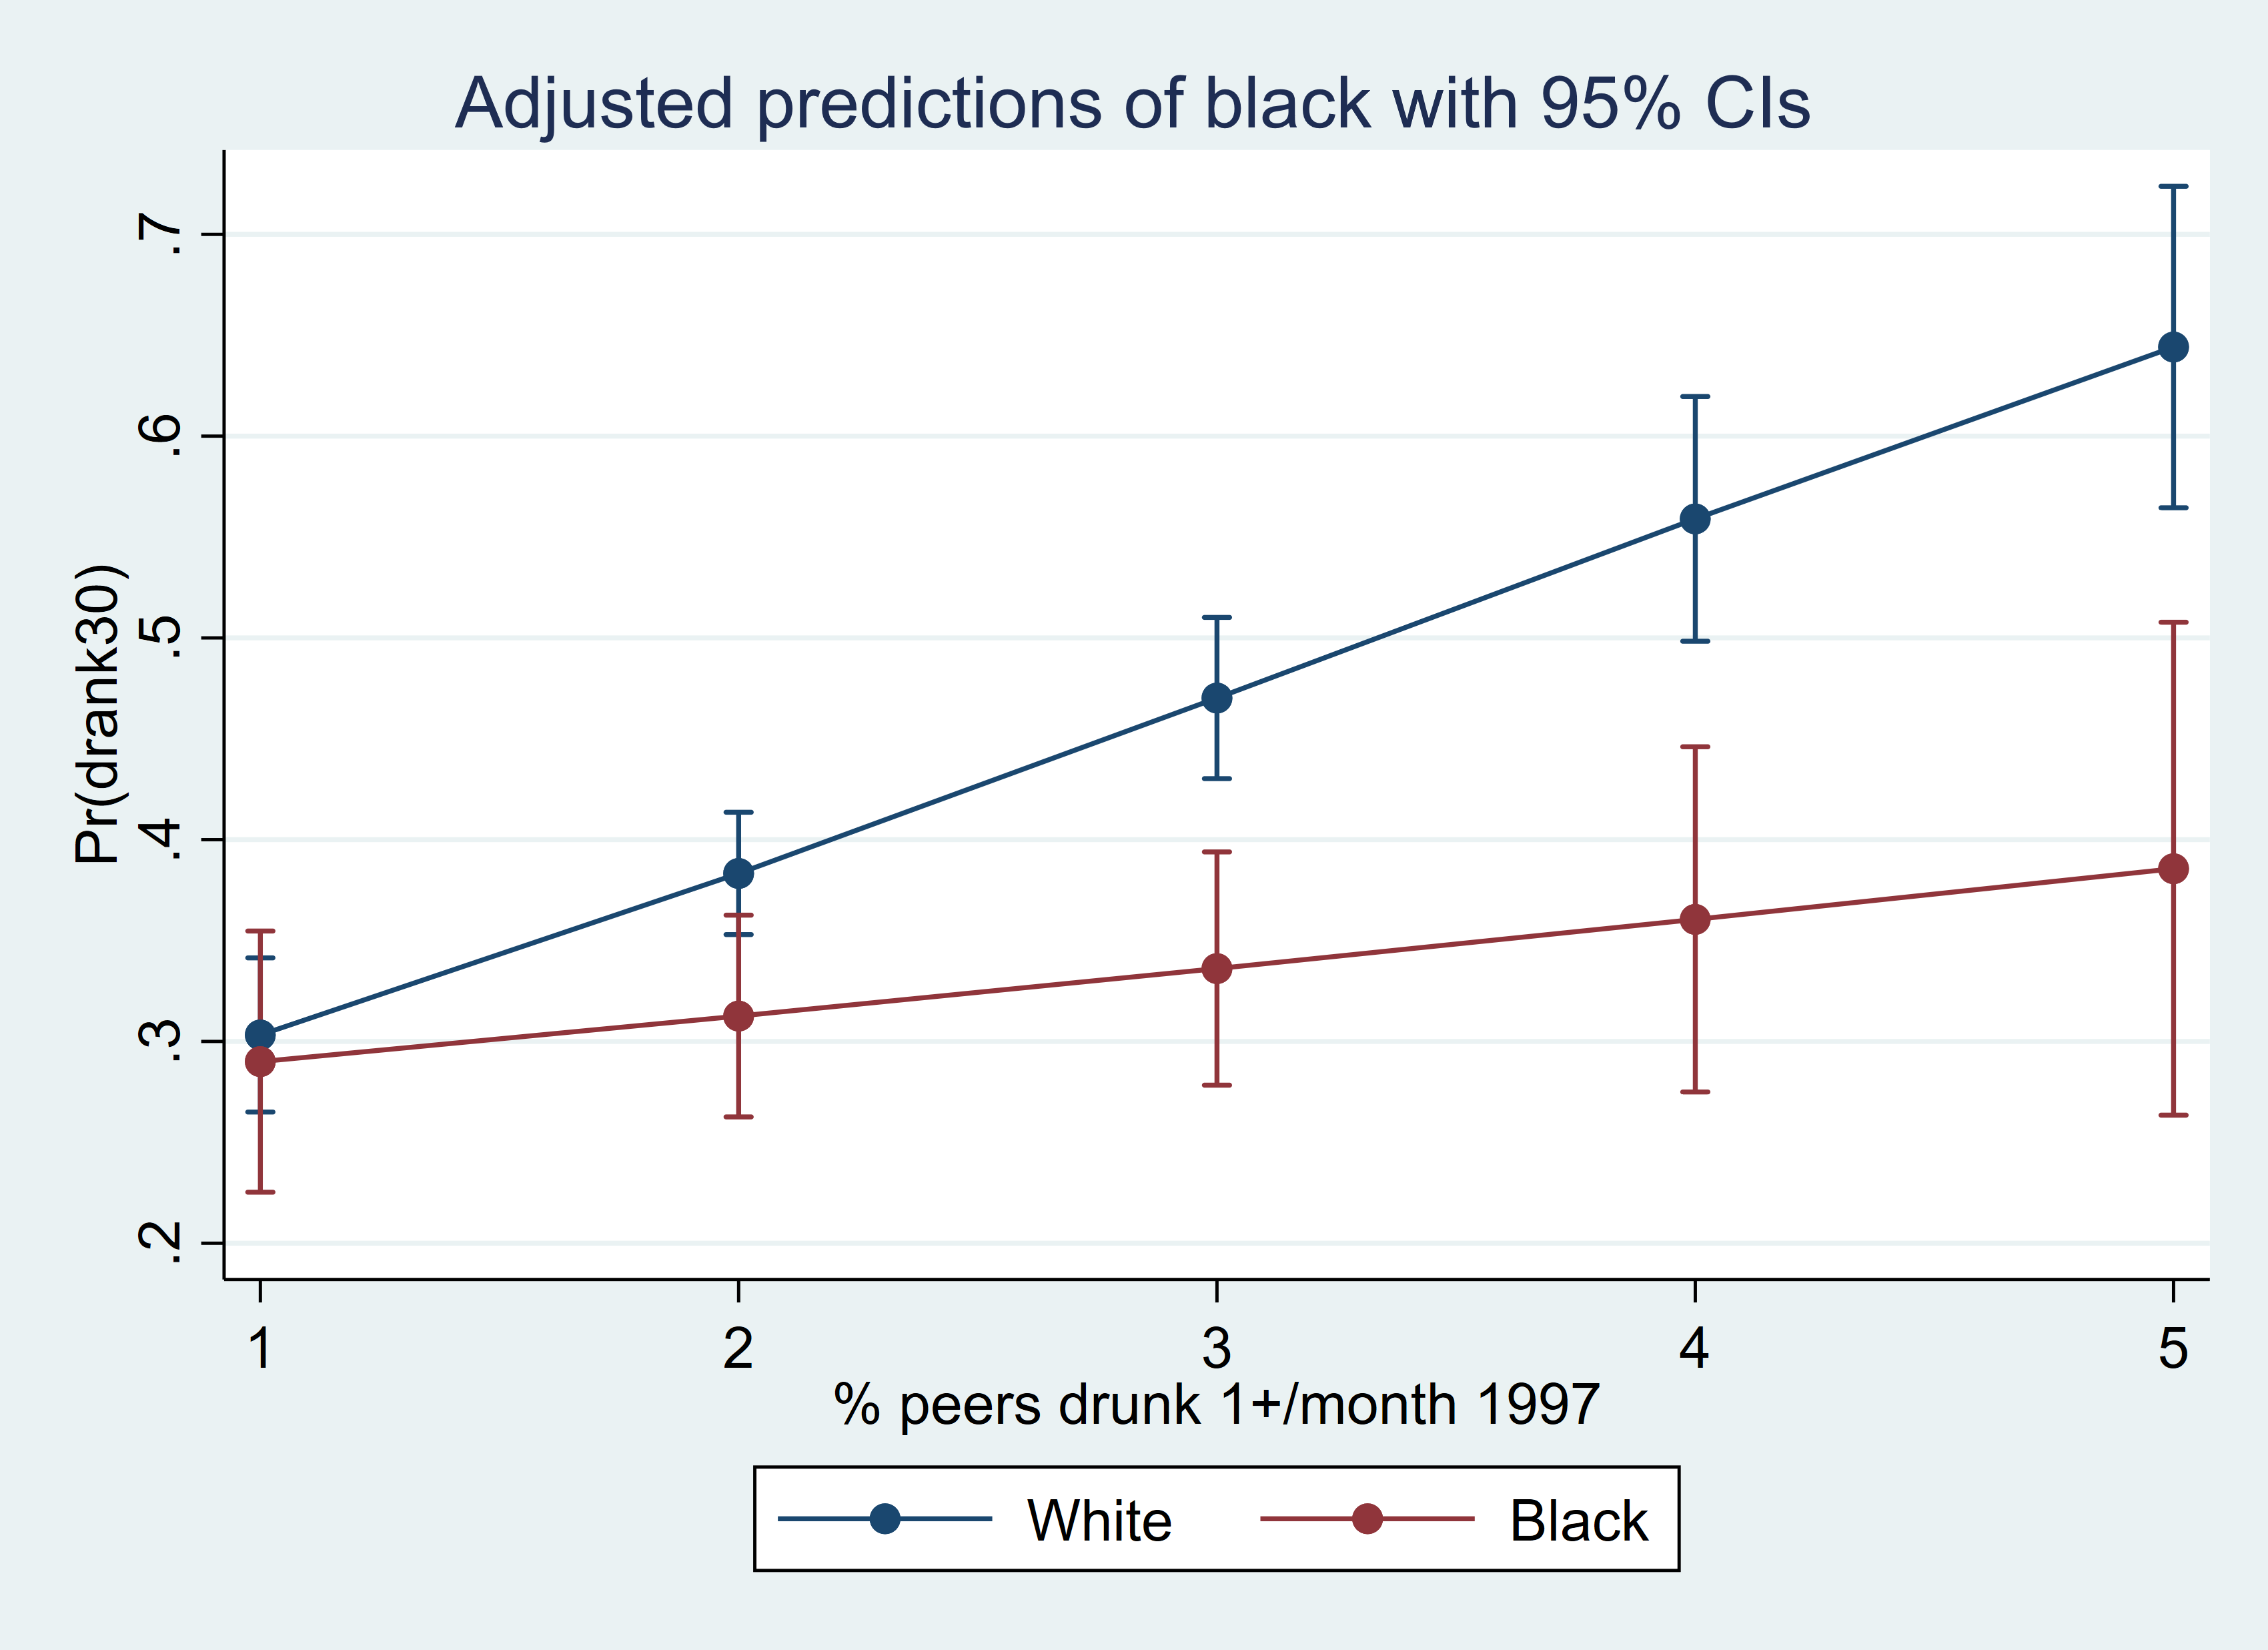

We see the odds for drinking in the last 30 days increases a greater rate for white people as number of peers who drink increases. The interaction term is also statistically significant.

## Practice: Logistic regression
* Q1: Open the nhanes2 dataset: https://www.stata-press.com/data/r17/nhanes2.dta
* Q2: Use codebook command on diabetes and region
* Q3: Write a logistic regression equation with diabetes as the dependent variable. Independent variables are age, rural, and region (with west as the reference category).
* Q4: Estimate the equation with Stata
* Q5: Use margins command to get the predicted probabilities of diabetes across regions holding other variables at the mean.

# Panel analysis: examining units over time

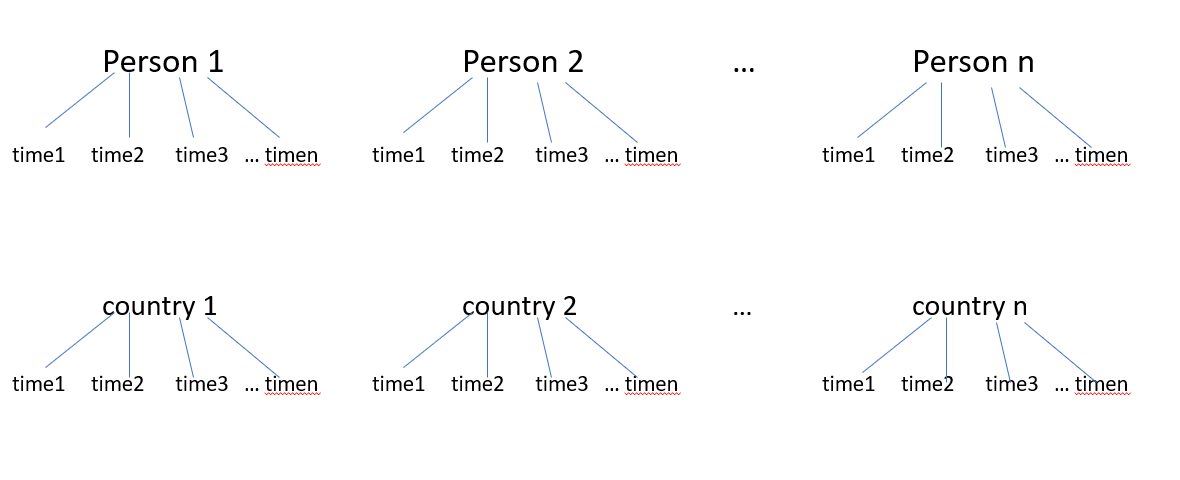

All the data and analyses we have done so far have been <i>cross-sectional.</i> Meaning they focus on a single-time period. If your data is panel meaning has data of observations over time, then you have to use panel analysis to estimate the model because observations over time are more likely to be dependent on each other.

Panel analysis examines observations over time. For example, you can examine country's CO2 emissions over time or individual's BMI indexes over time. One of the advantages of panel analysis, is that it is a stronger causal argument. Within sociological panel analysese the following two models are most frequently used:
* Random effects model
* Between effects model
* Fixed effects model

This is an example of panel data.

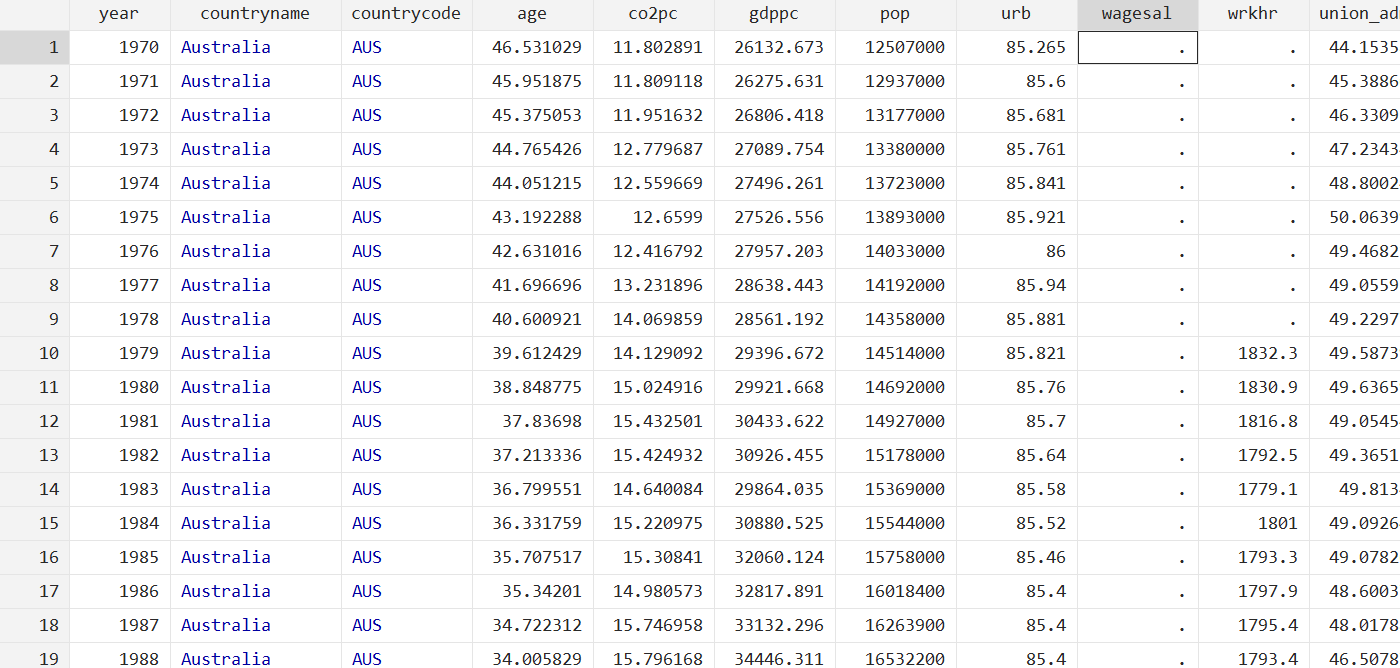

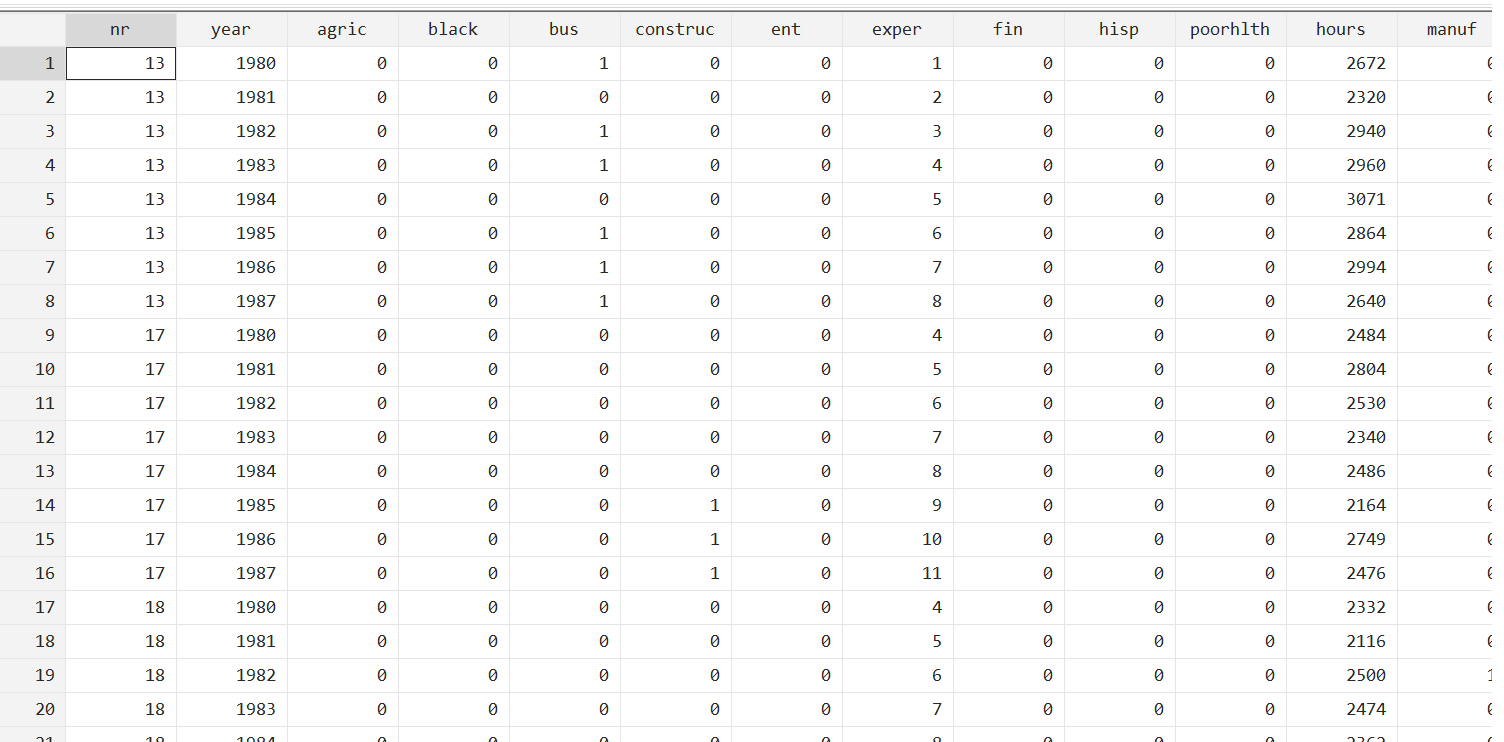

Within panel data, we have two types variables:
* temporal variables which are variables that change over time.
* non-temporal variables which are variables that DON'T change over time.

### Random effects model
The random effects model (also sometimes referred to as a random intercept model) for panel data where there are i clusters with t time points. The random effects model controls for time-dependence (t) by giving every i cluster it's own intercept. The random effects model examines all i and t observations in the panel data while controling for i clusters.

So for example, we can derive the random effects model by doing the following. First we have the panel represented as a traditional regression model:

<center>$y_{ti}=\beta_1+\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\xi_{pti}$
    
where $y_{ti}$ is the outcome at t time and i panel-observation

$\beta_1$ is intercept

$\beta_2 ... \beta_p$ is the coefficient for $x_{2ti} ... x_{pti}$
    
$x_{2ti} ... x_{pti}$ are the covariates/independent variables
    
$\xi_{pti}$ is the residual error term (this greek letter is pronouced like "sky" but with a z)

<b>But we need to do some sort of controlling here for the i clusters

Given that t times are clustered with i, we can substitute: $\xi_{ti}=\zeta_i + \epsilon_{ti}$

where $\zeta_i$ is difference between the overall population mean and i-cluster specific mean 

$\epsilon_{ti}$ is the residual error term for all observations

Now, substituting to the previous equation does...

<center>$y_{ti}=\beta_1+\beta_2*x_{2ti}+...+\beta_p*x_{pti}+(\zeta_i + \epsilon_{ti})$

<center>$y_{ti}=(\beta_1+\zeta_i)+\beta_2*x_{2ti}+...+\beta_p*x_{pti}+ \epsilon_{ti}$
    
where $(\beta_1+\zeta_t)$ is the i cluster-specific intercept

### Between effects model
The between effects model is a random-intercept model of the average of the dependent and independent variables of the model. The between-effects model observes only the between-j effects of the independent variables.

<center>$y_{.i}=\beta_1+\beta_2*\bar{x}_{2.i}+...+\beta_p*\bar{x}_{p.i}+\zeta_i + \bar{\epsilon}_{.i}$
    
where $y_{.i}$ is the mean outcome of i cluster

$\bar{x}_{2.i} ... \bar{x}_{p.i}$ is the average of the independent variables or covariates for i-cluster

$\zeta_i + \bar{\epsilon}_{.i}$ has the population mean $E(\zeta_t+\bar{\epsilon}_{.i})=0$ and has heteroskedastic variance $Var(\zeta_t+\bar{\epsilon}_{.i})=\psi+\theta/n_j$
    
<b>The between effects model doesn't have ANY within effects in the model. Any non-temporal variables are part of the intercept.

### Fixed effects model
The fixed effects model (sometimes referred to as "within-effects" model) examines only the effects within each i cluster. You derive the fixed effects model by taking the random effects model and subtracting the between effects model:

<center>$y_{ti}-y_{.i}=\beta_1+\beta_2*(x_{2ti}-\bar{x}_{2.i})+...+\beta_p*(x_{pti}-\bar{x}_{p.i})+\zeta_i+(\epsilon_{ti}-\bar{\epsilon}_{.i})$
    
Then, substitute the random intercept for i-specific clusters ($\beta_1+\zeta_i$) with a fixed intercept $\alpha_i$. We do this by using dummies for each i cluster:
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\sum \limits _{k=1} ^{i}d_{ki}\alpha_k+\epsilon_{ti}$
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\alpha_i+\epsilon_{ti}$
    
<b>The fixed effects model centers all independent variables around its own i-cluster mean. $\epsilon_{ti}-\bar{\epsilon}_{.i}$ has the population mean $E(\epsilon_{ti}-\bar{\epsilon}_{.i})=0$ and is heteroskedastic with variance $Var(\epsilon_{ti}-\bar{\epsilon}_{.i})=\theta(1-1/n_j)$.
    
Non-temporal covariates are dropped from the model. 

### Fixed effects model
The fixed effects model (sometimes referred to as "within-effects" model) examines only the effects within each i cluster. You derive the fixed effects model by taking the random effects model and subtracting the between effects model:

<center>$y_{ti}-y_{.i}=\beta_1+\beta_2*(x_{2ti}-\bar{x}_{2.i})+...+\beta_p*(x_{pti}-\bar{x}_{p.i})+\zeta_i+(\epsilon_{ti}-\bar{\epsilon}_{.i})$
    
Then, substitute the random intercept for i-specific clusters ($\beta_1+\zeta_i$) with a fixed intercept $\alpha_i$. We do this by using dummies for each i cluster:
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\sum \limits _{k=1} ^{i}d_{ki}\alpha_k+\epsilon_{ti}$
    
<center>$y_{ti}=\beta_2*x_{2ti}+...+\beta_p*x_{pti}+\alpha_i+\epsilon_{ti}$
    
<b>The fixed effects model centers all independent variables around its own i-cluster mean. $\epsilon_{ti}-\bar{\epsilon}_{.i}$ has the population mean $E(\epsilon_{ti}-\bar{\epsilon}_{.i})=0$ and is heteroskedastic with variance $Var(\epsilon_{ti}-\bar{\epsilon}_{.i})=\theta(1-1/n_j)$.
    
Non-temporal covariates are dropped from the model. 

## Discussion
In groups, explain/define to each other the following:
* Panel data
* Random effects model
* Between effects model
* Fixed effects model

## Let's practice running these various models in Stata

### Reshaping the data
Before estimating panel results, data must be in long format. The data we are working with right now, is currently in wide format, meaning there are multiple variables representing the each time period for the variables.

In [3]:
*load the data
use "https://www.stata-press.com/data/mlmus4/pefr.dta", clear
desc
*This is how wide data looks like
list if id<6




Contains data from https://www.stata-press.com/data/mlmus4/pefr.dta
 Observations:            17                  
    Variables:             5                  26 Nov 2004 15:45
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
id              float   %9.0g                 
wp1             float   %9.0g                 
wp2             float   %9.0g                 
wm1             float   %9.0g                 
wm2             float   %9.0g                 
--------------------------------------------------------------------------------
Sorted by: 


     +----------------------------+
     | id   wp1   wp2   wm1   wm2 |
     |----------------------------|
  1. |  1   494   490   512   525 |
  2. |  2   395   397   430   415 |
  3. |  3   516   512   520   508 |
  4. |  

In [4]:
*You can reshape the data in Stata
reshape long wp wm, i(id) j(time)

(j = 1 2)

Data                               Wide   ->   Long
-----------------------------------------------------------------------------
Number of observations               17   ->   34          
Number of variables                   5   ->   4           
j variable (2 values)                     ->   time
xij variables:
                                wp1 wp2   ->   wp
                                wm1 wm2   ->   wm
-----------------------------------------------------------------------------


In [28]:
list if id<6


     +-----------------------+
     | id   time    wp    wm |
     |-----------------------|
  1. |  1      1   494   512 |
  2. |  1      2   490   525 |
  3. |  2      1   395   430 |
  4. |  2      2   397   415 |
  5. |  3      1   516   520 |
     |-----------------------|
  6. |  3      2   512   508 |
  7. |  4      1   434   428 |
  8. |  4      2   401   444 |
  9. |  5      1   476   500 |
 10. |  5      2   470   500 |
     +-----------------------+


Notice the the difference. Data must be in long format in order to run panel analysis.

The previous example was just for us to practice reshaping data. 

Now, we will open data that is already in long format. This is a dataset is mothers giving birth beween 1990 to 1998. This is subset from Abrevaya 2006 data published in the Journal of Applied Econometrics Data Archive. Here are main variables:

* momid: mother identifier
* birwt: birthweight (in grams)
* smoke: dummy variable for mother smoking during pregnancy
* male: dummy variable for sex of baby
* mage: mother's age at birth (in yrs)
* hsgrad: dummy variable of mom's grad HS
* somecoll: dummy variable of mom's having some college or more
* collgrad: dummy variable of mom's graduate college
* (omitted): reference catgory where mom's did not graduate HS
* married: dummy variable of married
* black: dummy variable for racial identity Black person
* kessner2: Kessner index=2 is of adequate prenatal care
* kessner3: Kessner index=3 is of adequate prenatal care
* omitted: Kessner index=1 is of adequate prenatal care (ref category)
* novisit: dummy variable no prenatal care visit
* pretri2: dummy variable fo first prenatal care visit in 2nd trimester
* pretri3: dummy variable fo first prenatal care visit in 3rd trimester
* omitted: ref cat of first prenatal care visit in 1st trimester

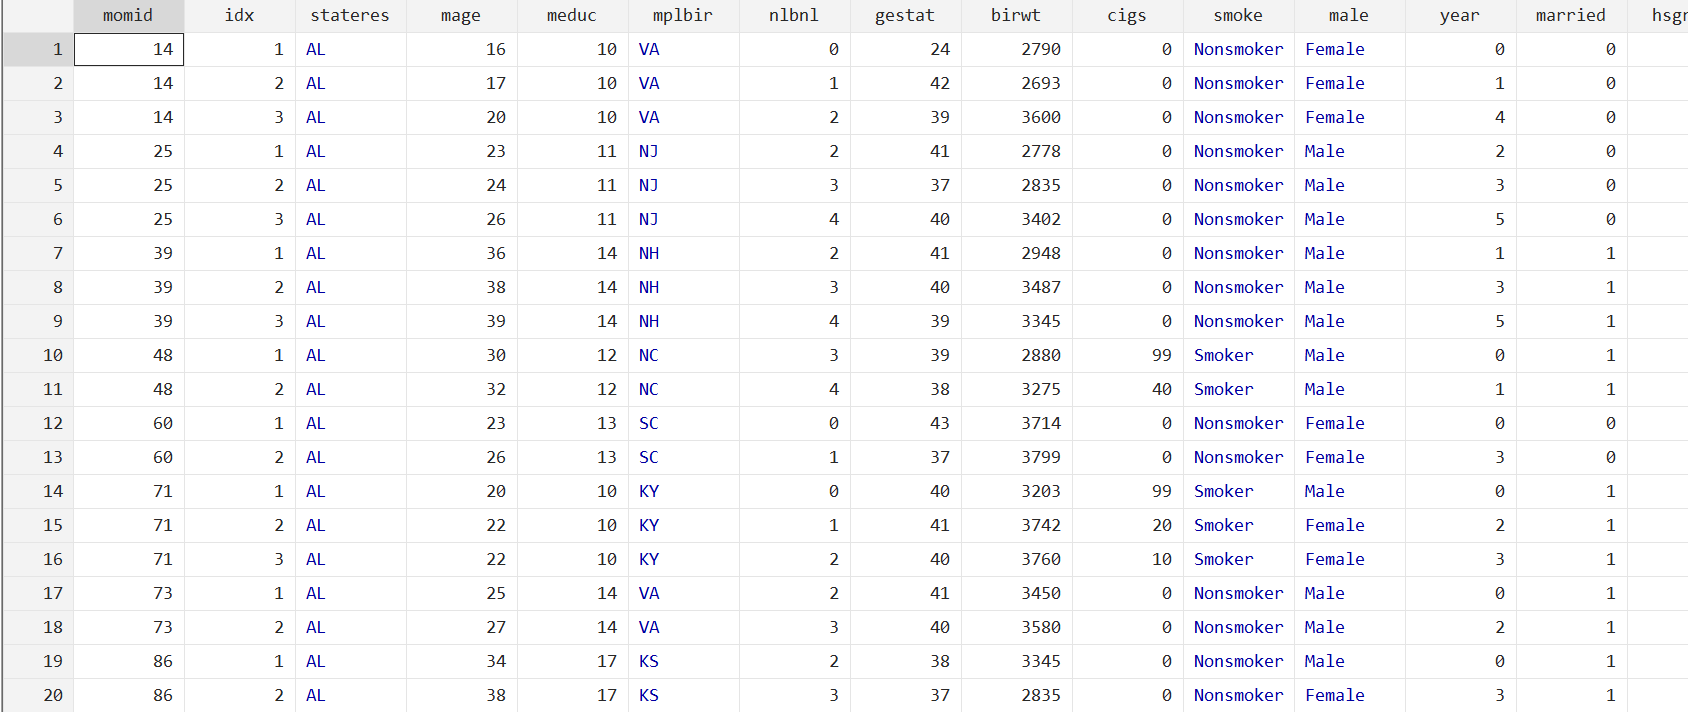

In [5]:
*Let's run the data 
use "https://www.stata-press.com/data/mlmus4/smoking.dta",clear
desc




Contains data from https://www.stata-press.com/data/mlmus4/smoking.dta
 Observations:         8,604                  
    Variables:            24                  21 Jul 2007 11:49
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
momid           float   %9.0g                 
idx             float   %9.0g                 
stateres        float   %9.0g      state      
mage            float   %9.0g                 
meduc           float   %9.0g                 
mplbir          float   %9.0g      state      
nlbnl           float   %9.0g                 
gestat          float   %9.0g                 
birwt           float   %9.0g                 
cigs            float   %9.0g                 
smoke           float   %9.0g      s          
male            float   %9.0g     

In [6]:
list in 1/3


     +-------------------------------------------------------------------------+
  1. | momid | idx | stateres | mage | meduc | mplbir | nlbnl | gestat | birwt |
     |    14 |   1 |       AL |   16 |    10 |     VA |     0 |     24 |  2790 |
     |-------+-----------------------------------------------------------------|
     | cigs  |     smoke  |   male  | year  | married  |  hsgrad  |  somecoll  |
     |    0  | Nonsmoker  | Female  |    0  |       0  |       0  |         0  |
     |-------------------------------------------------------------------------|
     | collgrad | magesq | black | kessner2  | kessner3  | novisit  | pretri2  |
     |        0 |    256 | Black |        0  |        1  |       0  |       0  |
     |-------------------------------------------------------------------------|
     |                                 pretri3                                 |
     |                                       1                                 |
     +---------------------

### XTSET: you must tell Stata, the data is panel using the xtset command.

In [7]:
*use the i cluster
xtset momid


Panel variable: momid (unbalanced)


<i>Balanced panel data means no data is missing among the years. Unbalanced data means there are some missing years.

In [8]:
*Stata has many specific panel commands "xt"
*xtsum reports summary statistics overall, between, and within the data.
xtsum birwt smoke black year


Variable         |      Mean   Std. dev.       Min        Max |    Observations
-----------------+--------------------------------------------+----------------
birwt    overall |  3469.931   527.1394        284       5642 |     N =    8604
         between |             451.1943       1361     5183.5 |     n =    3978
         within  |             276.7966   1528.431   5411.431 | T-bar =  2.1629
                 |                                            |
smoke    overall |  .1399349   .3469397          0          1 |     N =    8604
         between |             .3216459          0          1 |     n =    3978
         within  |             .1368006  -.5267318   .8066016 | T-bar =  2.1629
                 |                                            |
black    overall |  .0717108   .2580235          0          1 |     N =    8604
         between |              .257512          0          1 |     n =    3978
         within  |                    0   .0717108   .0717108 | T-bar =

Here, there are 3978 mothers observed over 8 years. Since the data is unbalanced that means that some mothers have missing years.

## Estimating models
Once the data is in long format and the data has been declared a panel data in Stata, we can now estimate models.

### Random effects model
In Stata, you can use the xtreg command to estimate random effects model.

In [9]:
*mle stands for maximum likelihood estimation and vce is to use robust standard errors
xtreg birwt smoke male mage hsgrad somecoll collgrad ///
    married black kessner2 kessner3 novisit pretri2 pretri3, mle vce(robust)


Fitting constant-only model:
Iteration 0:   log likelihood = -65475.527
Iteration 1:   log likelihood = -65475.486

Fitting full model:
Iteration 0:   log likelihood = -65149.757
Iteration 1:   log likelihood = -65145.754
Iteration 2:   log likelihood = -65145.752

Random-effects ML regression                         Number of obs    =  8,604
Group variable: momid                                Number of groups =  3,978

Random effects u_i ~ Gaussian                        Obs per group:
                                                                  min =      2
                                                                  avg =    2.2
                                                                  max =      3

                                                     Wald chi2(13)    = 625.35
Log likelihood = -65145.752                          Prob > chi2      = 0.0000

                              (Std. err. adjusted for 3,978 clusters in momid)
------------------------------

## Discussion
In groups, write down your interpretations of the results. Make sure to preface it by discussing what random effects model estimates. Discuss estimates, direction, and statistical significance.

### my answer below
Since we did a random effects model, our results are generalized to the whole sample. They are estimates of population mean birthweight. Mothers are being compared to all other mothers and times. The results report a negative significant relationship between birthweight and smoker status. Meaning mother who smoked during preganacy have lower birthweight of their newborn as compared to mothers who did not smoke. Another way to say this is the population mean birthweight for mothers who smoked is 218 grams lower than mothers who did not smoke, all else equal. 

Women scoring within the "kessner2" have significantly lower birthweight as compared to mother in the "kessner1" (ref category). Moreover, women scoring in the "kessner3 have significantly lower birthweight as compared to mothers in "kessner1." Since kessner3 < kessner2 and both variables are being compared to kessner1, we can make the following more general statement: Mothers who score higher on kessner index have significantly lower birthweight of their newborns. Moreover, mothers who do not have a prenatal visit have lower birthweight as compared to mothers who had their first prenatal visit in their first trimester, but the value is not significant.

Mothers giving birth to male children are significantly higher birthweight as compared to female babies. As a mothers age increases there is a significant increase in birthweight of child. Another way to report this is by saying: for every one year increase in a mother's age, there is a corresponding 8.10 increase in birthweight grams, all else equal (or holding all other variables constant). As a mother's educational attainment increases, there is a corresponding significant increase in birthweight grams. Mothers who are married have higher birthweight of their newborn as compared to non-married mothers (the resuts are slightly significant p=.061). Black mothers report significantly lower birthweight in their new borns as compared to white mothers. 

/sigma_u is the standard deviation of the random intercept. /sigma_e is the stand deviation of all the observations residuals. The sample here is 8,604. 

In [10]:
gen education=hsgrad*1+somecoll*2+collgrad*3
label define ed 0 "No HS Degree" 1 "HS Degree" 2 "Some Coll" 3 "College"
label values education ed

In [12]:
gen visit=1
replace visit=0 if novisit==1
replace visit=2 if pretri2==1
replace visit=3 if pretri3==1
label define visit 0 "No visit" 1 "1st trimester" 2 "2nd trimester" 3 "3rd trimester"
label values education visit



(78 real changes made)

(1,113 real changes made)

(194 real changes made)




In [13]:
*running a random effect models
*mle stands for maximum likelihood estimation and vce is to use robust standard errors
xtreg birwt male mage i.education ///
    married black kessner2 kessner3 i.smoke##i.visit, mle vce(robust)


Fitting constant-only model:
Iteration 0:   log likelihood = -65475.527
Iteration 1:   log likelihood = -65475.486

Fitting full model:
Iteration 0:   log likelihood = -65143.949
Iteration 1:   log likelihood = -65139.355
Iteration 2:   log likelihood = -65139.353

Random-effects ML regression                         Number of obs    =  8,604
Group variable: momid                                Number of groups =  3,978

Random effects u_i ~ Gaussian                        Obs per group:
                                                                  min =      2
                                                                  avg =    2.2
                                                                  max =      3

                                                     Wald chi2(16)    = 637.98
Log likelihood = -65139.353                          Prob > chi2      = 0.0000

                               (Std. err. adjusted for 3,978 clusters in momid)
-----------------------------

In [14]:
margins i.smoke#i.education


Predictive margins                                       Number of obs = 8,604
Model VCE: Robust

Expression: Linear prediction, predict()

-------------------------------------------------------------------------------
              |            Delta-method
              |     Margin   std. err.      z    P>|z|     [95% conf. interval]
--------------+----------------------------------------------------------------
        smoke#|
    education |
   Nonsmoker #|
    No visit  |   3431.809   24.64492   139.25   0.000     3383.506    3480.113
   Nonsmoker #|
1st trimes..  |   3487.635   13.80283   252.68   0.000     3460.582    3514.688
   Nonsmoker #|
2nd trimes..  |   3511.651   13.77456   254.94   0.000     3484.653    3538.649
   Nonsmoker #|
3rd trimes..  |   3522.726   12.02434   292.97   0.000     3499.158    3546.293
      Smoker #|
    No visit  |   3216.889   26.76388   120.20   0.000     3164.432    3269.345
      Smoker #|
1st trimes..  |   3272.714   20.94898   156.22   0.

In [15]:
marginsplot, xdimension(education)
graph export "intersmokeedu.png", replace width(3400)



Variables that uniquely identify margins: smoke education

file C:/Users/acade/.stata_kernel_cache/graph0.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph0.pdf saved as PDF format

(file intersmokeedu.png not found)
file intersmokeedu.png saved as PNG format


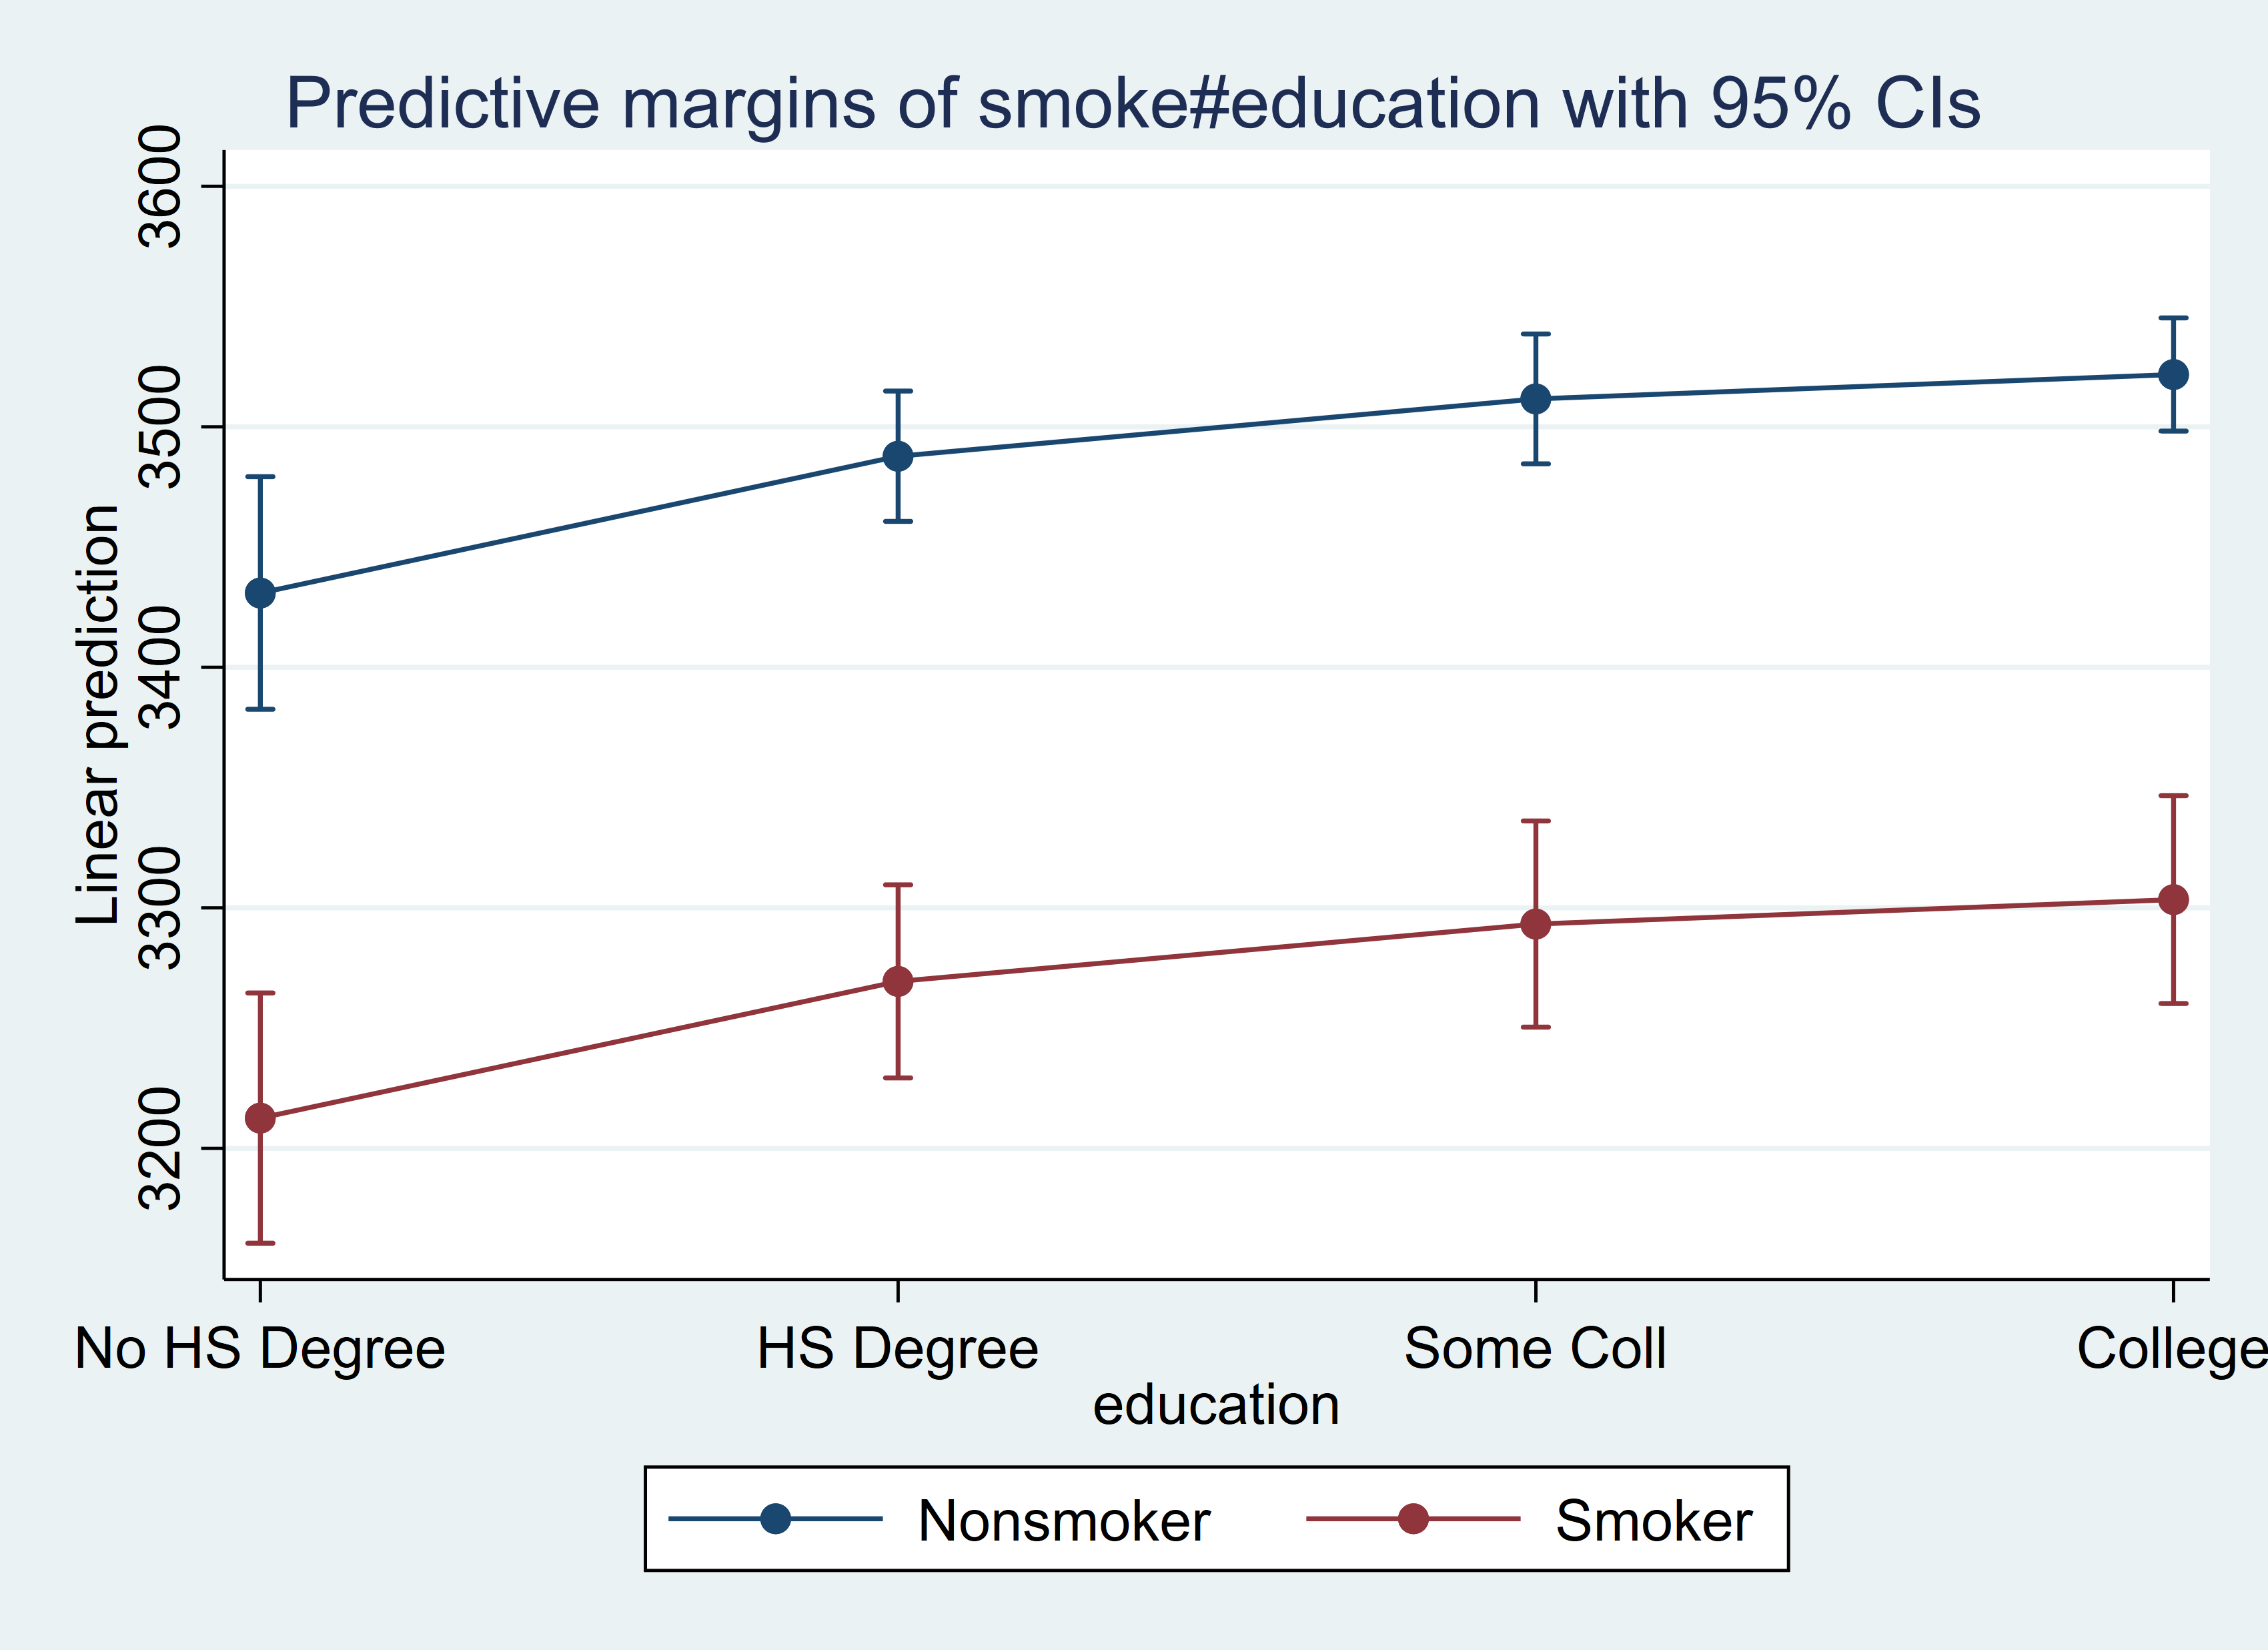

Here, we see mothers who smoke during pregnancy have lower bithweight across all educational attainments as compared to mother who did not smoke during pregnancy.

### Between effects model
In Stata, you can use the xtreg command with "be" to estimate between effects model.

In [16]:
xtreg birwt i.smoke male mage i.education married black ///
    kessner2 kessner3 novisit pretri2 pretri3, be


Between regression (regression on group means)  Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-squared:                                      Obs per group:
     Within  = 0.0299                                         min =          2
     Between = 0.1168                                         avg =        2.2
     Overall = 0.0949                                         max =          3

                                                F(13,3964)        =      40.31
sd(u_i + avg(e_i.)) = 424.7306                  Prob > F          =     0.0000

-------------------------------------------------------------------------------
        birwt | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
        smoke |
      Smoker  |  -286.1476   23.22554   -12.32   0.000    -331.6828   -240.6125
         male |   104.9432   19.49531     5.

## Discussion
In groups, write down your interpretations of the results. Make sure to preface it by discussing what between effects model estimates. Discuss estimates, direction, and statistical significance.

### my answer below
Remember these results only report the population mean BETWEEN mothers only. When comparing between-mother effects, mothers who smoked during pregnancy have 286 grams significantly lower birthweight as compared to mother who did not smoke. Mothers with male new borns have 105 grams higher as compared to female new borns (a significant difference). Between mothers, we find that for every one year increase in mother's age there is a 4 grams significantly higher in birthweight of newborn. The table above reports that between mothers, as mothers educational attainment increases there is a corresponding significant increase in birthweight. The estimated coefficient between mothers for married mothers is 42 grams higher as compared for non-married mothers (p=.108). Between mothers, Black mothers have 218 grams significantly lower as compared to white mothers. As the kessner index increases for mothers, there is a corresponding significantly decrease in birthweight. Between mothers, mothers who did not have a prenatal visit have 51 grams lower in birthweight as compared to mothers who had their first prenatal visit in their first trimester.

Important notes, the sample of the between-effects model is 3,978.

### Fixed effects model
In Stata, you can use the xtreg command with "fe" to estimate fixed effects model.

In [17]:
xtreg birwt i.smoke male mage ///
    kessner2 kessner3 novisit pretri2 pretri3, fe vce(robust)


Fixed-effects (within) regression               Number of obs     =      8,604
Group variable: momid                           Number of groups  =      3,978

R-squared:                                      Obs per group:
     Within  = 0.0465                                         min =          2
     Between = 0.0557                                         avg =        2.2
     Overall = 0.0546                                         max =          3

                                                F(8,3977)         =      26.78
corr(u_i, Xb) = -0.0733                         Prob > F          =     0.0000

                              (Std. err. adjusted for 3,978 clusters in momid)
------------------------------------------------------------------------------
             |               Robust
       birwt | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       smoke |
     Smoker  

## Discussion
In groups, write down your interpretations of the results. Make sure to preface it by discussing what fixed effects model estimates. Discuss estimates, direction, and statistical significance.

### my answer
The Fixed effects model reports only within-mother effects. That means only mothers are compared within themselves over time. Mothers are their own control. Because of this, you DO NOT include non-temporal variables (like educational attainment, married, or black variables). The table above finds that within-mothers, mothers who smoke during pregnancy report 105 grams significant lower birthweight. Male babies report 126 grams significantly higher birthweight as compared to female babies. As the kessner index increases there is significant corresponding decrease in grams in birthweight. The within-effect difference of mothers who do not do a pre-natal visit is 5 grams lower as compared to mothers who had their first pre-natal visit in their first trimester. Mothers who have their first pre-natal visit in their second trimester have 81 grams significant higher grams in birthweight as compare to mothers who had their first pre-natal visit in their first trimester. Mothers who have their first pre-natal visit in their third trimester have 153 grams significant higher grams in birthweight as compare to mothers who had their first pre-natal visit in their first trimester.

<b> Note, you cannot general fixed effects to the general population, it is cluster specific. </b>

### Let's compare the estimates across models:

| model type | Random effects | Between effects | Within effects (fixed effects)|
| --- | --- | --- | --- |
| paramters | est (SE) | est (SE) | est (SE) |
| intercept | 3,117 (43) | 3,241 (46) | n/a |
| smoke | -218 (19) | -286 (23) | -105 (32) | 
| male | 121 (10) | 105 (19) | 126 (11) |
| mage | 8 (1) | 4 (2) | 23 (3) | 
| hsgrad | 57 (26) | 59 (26) | n/a |
| somecoll | 81 (28) | 85 (28) | n/a |
| collgrad | 91 (29) | 100 (29) | n/a | 
| married | 50 (27) | 42 (26) | n/a |
| black | -211 (29) | -218 (29) | n/a |
| kessner2 | -93 (22) | -101 (38) | -91 (26) |
| kessner3 | -151 (41) | -202 (79) | -128 (49) | 
| novisit | -30 (81) | -51 (124) | -5 (91) | 
| pretri2 | 93 (25) | 125 (45) | 81 (29) |
| pretri3 | 179 (53) | 241 (101) | 153 (62) |

Because random effects uses both between-effects and within-effects. Random effect coefficients are between the estimates of between-effects and within-effects.

You should always make your decision of what model to use based on theory and previous research. But there is a Hausman test that can statistically assess which model is best for your data.

## Panel analysis and Logistic regression
In the occasion that we have a dichotomous variable, need to adapt our model to using logit and reporting odds ratios. Here is a random-intercept logistic regression model:

<center>${Pr(y_{ti}=1|x_{ti},\zeta_i)}=\beta_1+\beta_2*x_{2i}+...+\beta_p*x_{pti}+\zeta_i$
    

<center>$\pi_{ti}=Pr(y_{ti}|x_{ti},\zeta_i)$ where

<center>$logit(\pi_{ti})=\beta_1+\beta_2*x_{2t}+\beta_2*x_{3ti}+...+\beta_p*x_{pti}+\zeta_i$
    
<center>$y_{ti}|\pi_{ti} ~ Binomial(1,\pi_{ti})$

In [25]:
use https://www.stata-press.com/data/r17/union
desc


(NLS Women 14-24 in 1968)


Contains data from https://www.stata-press.com/data/r17/union.dta
 Observations:        26,200                  NLS Women 14-24 in 1968
    Variables:             8                  4 May 2020 13:54
                                              (_dta has notes)
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
idcode          int     %8.0g                 NLS ID
year            byte    %8.0g                 Interview year
age             byte    %8.0g                 Age in current year
grade           byte    %8.0g                 Current grade completed
not_smsa        byte    %8.0g                 1 if not SMSA
south           byte    %8.0g                 1 if south
union           byte    %8.0g                 1 if union
black           byte 

In [26]:
list in 1/3


     +----------------------------------------------------------------+
     | idcode   year   age   grade   not_smsa   south   union   black |
     |----------------------------------------------------------------|
  1. |      1     72    20      12          0       0       1       1 |
  2. |      1     77    25      12          0       0       0       1 |
  3. |      1     80    28      12          0       0       1       1 |
     +----------------------------------------------------------------+


In [27]:
xtset idcode


Panel variable: idcode (unbalanced)


## Random effects model (logistic regression)

In [32]:
*intpoints is used to ensure accuracy for xtlogit models
xtlogit union age grade not_smsa south##c.year, intpoints(30) or


Fitting comparison model:

Iteration 0:   log likelihood =  -13864.23  
Iteration 1:   log likelihood = -13547.326  
Iteration 2:   log likelihood = -13542.493  
Iteration 3:   log likelihood =  -13542.49  
Iteration 4:   log likelihood =  -13542.49  

Fitting full model:

tau =  0.0     log likelihood =  -13542.49
tau =  0.1     log likelihood = -12923.751
tau =  0.2     log likelihood = -12417.651
tau =  0.3     log likelihood = -12001.666
tau =  0.4     log likelihood = -11655.594
tau =  0.5     log likelihood = -11366.435
tau =  0.6     log likelihood = -11128.681
tau =  0.7     log likelihood = -10946.497
tau =  0.8     log likelihood =  -10844.83

Iteration 0:   log likelihood = -10946.505  
Iteration 1:   log likelihood = -10558.911  
Iteration 2:   log likelihood =  -10541.21  
Iteration 3:   log likelihood = -10541.037  
Iteration 4:   log likelihood = -10541.036  

Random-effects logistic regression                   Number of obs    = 26,200
Group variable: idcode          

## Fixed effects model logistic regression)
Now, remember how we derive fixed effects model earlier? If an an i cluster has the same categorical outcome across t time, in the fixed effects model logistic regression they are dropped out. Stata will automatically do.

In [29]:
xtlogit union age grade not_smsa south##c.year, fe

note: multiple positive outcomes within groups encountered.
note: 2,744 groups (14,165 obs) omitted because of all positive or
      all negative outcomes.

Iteration 0:   log likelihood = -4516.5881  
Iteration 1:   log likelihood = -4510.8906  
Iteration 2:   log likelihood =  -4510.888  
Iteration 3:   log likelihood =  -4510.888  

Conditional fixed-effects logistic regression        Number of obs    = 12,035
Group variable: idcode                               Number of groups =  1,690

                                                     Obs per group:
                                                                  min =      2
                                                                  avg =    7.1
                                                                  max =     12

                                                     LR chi2(6)       =  78.60
Log likelihood = -4510.888                           Prob > chi2      = 0.0000

--------------------------------------

<b> logistic regression practice</b>

In [6]:
use "https://www.stata-press.com/data/r17/nhanes2.dta", clear
codebook diabetes region




--------------------------------------------------------------------------------
diabetes                                                         Diabetes status
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: diabetes

                 Range: [0,1]                         Units: 1
         Unique values: 2                         Missing .: 2/10,351

            Tabulation: Freq.   Numeric  Label
                        9,850         0  Not diabetic
                          499         1  Diabetic
                            2         .  

--------------------------------------------------------------------------------
region                                                                    Region
--------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: region

                 Range: [1,4]        

<center>$Pr(diabetes_i=1)=F(\beta_0+\beta_1*(age_i)+\beta_2*(rural_i)+\beta_3*(northeast_i)+\beta_4*(mountainwest_i)+\beta_4*(south_i))$
    
<center>$ where $
    <center> $ F(z) = e^{z} / (1+ e^{z}) $

In [7]:
logistic diabetes age i.rural ib4.region


Logistic regression                                     Number of obs = 10,349
                                                        LR chi2(5)    = 348.59
                                                        Prob > chi2   = 0.0000
Log likelihood = -1825.4636                             Pseudo R2     = 0.0872

------------------------------------------------------------------------------
    diabetes | Odds ratio   Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
         age |   1.060833   .0039663    15.79   0.000     1.053088    1.068635
             |
       rural |
      Rural  |    .925828   .0902857    -0.79   0.429     .7647545    1.120827
             |
      region |
         NE  |    1.09309   .1567141     0.62   0.535     .8253171    1.447741
         MW  |   1.108054   .1489206     0.76   0.445     .8514534    1.441986
          S  |   1.341341   .1710474     2.30   0.021     1.044707   

The odd ratios of having diabetes are multiplied by 1.06 for every one year increase to age. In other words, for every one year increase in age, there is a 6% significant increase in odds of diabetes. The odd ratios of having diabetes for rural residents are 0.93 as compared to non-rural residents however it is not significant. In other words, the odds for having diabetes for people residing in rural areas is 7% less as compared to those residing in non-rural areas. People living in the northeast are estimated to have 9% nonsignificant increase in odds in diabetes as compared to those living in the west region. Those residing in the mountain west have a 11% nonsignificant increase in odds in diabetes as compared to the west region. Southern residents have a significantly higher odds of having diabetes as compared to western residents.

In [8]:
margins region, atmeans


Adjusted predictions                                    Number of obs = 10,349
Model VCE: OIM

Expression: Pr(diabetes), predict()
At: age      =  47.5818 (mean)
    0.rural  = .6326215 (mean)
    1.rural  = .3673785 (mean)
    1.region =  .202435 (mean)
    2.region = .2679486 (mean)
    3.region = .2756788 (mean)
    4.region = .2539376 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      region |
         NE  |   .0311291   .0034867     8.93   0.000     .0242954    .0379629
         MW  |   .0315418   .0031714     9.95   0.000     .0253261    .0377576
          S  |   .0379307   .0034768    10.91   0.000     .0311164     .044745
          W  |   .0285538   .0030197     9.46   0.000     .0226353    .0344723
-------------------------------------------

In [9]:
marginsplot
graph export "region_diabetes.png", replace width(3400)



Variables that uniquely identify margins: region

file C:/Users/acade/.stata_kernel_cache/graph1.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph1.pdf saved as PDF format

(file region_diabetes.png not found)
file region_diabetes.png saved as PNG format


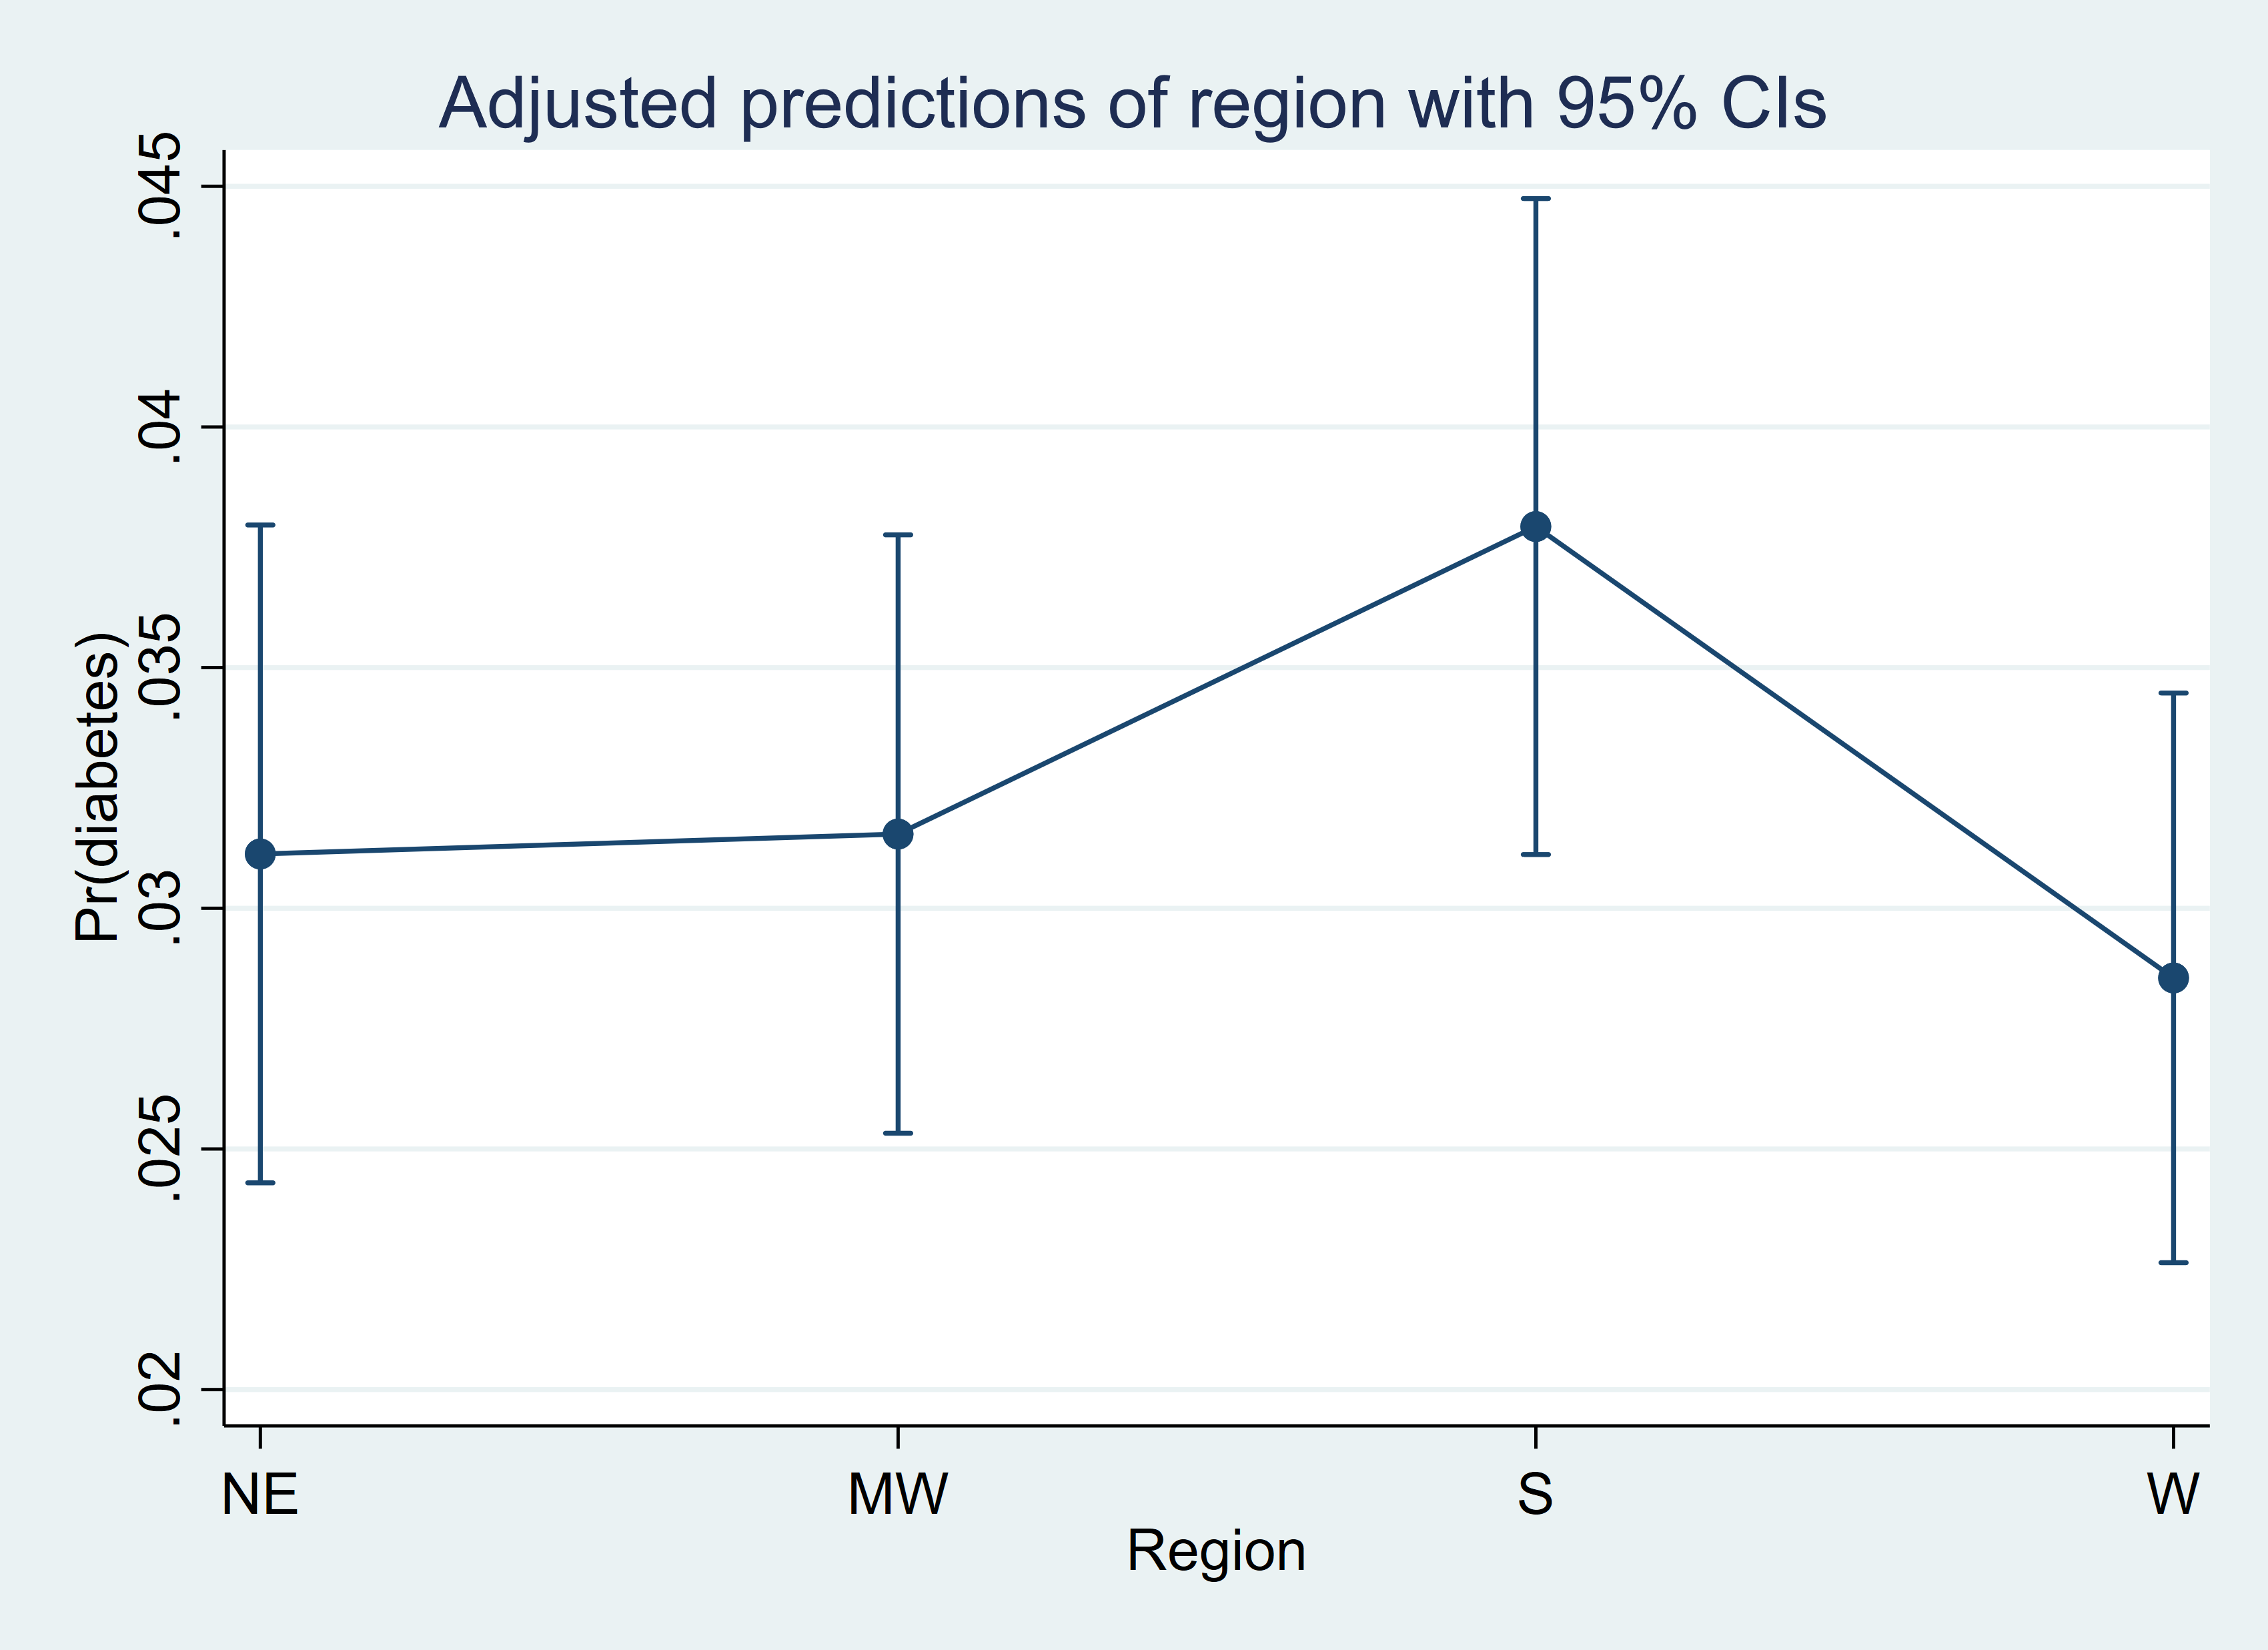

These are predicted probabilities. 